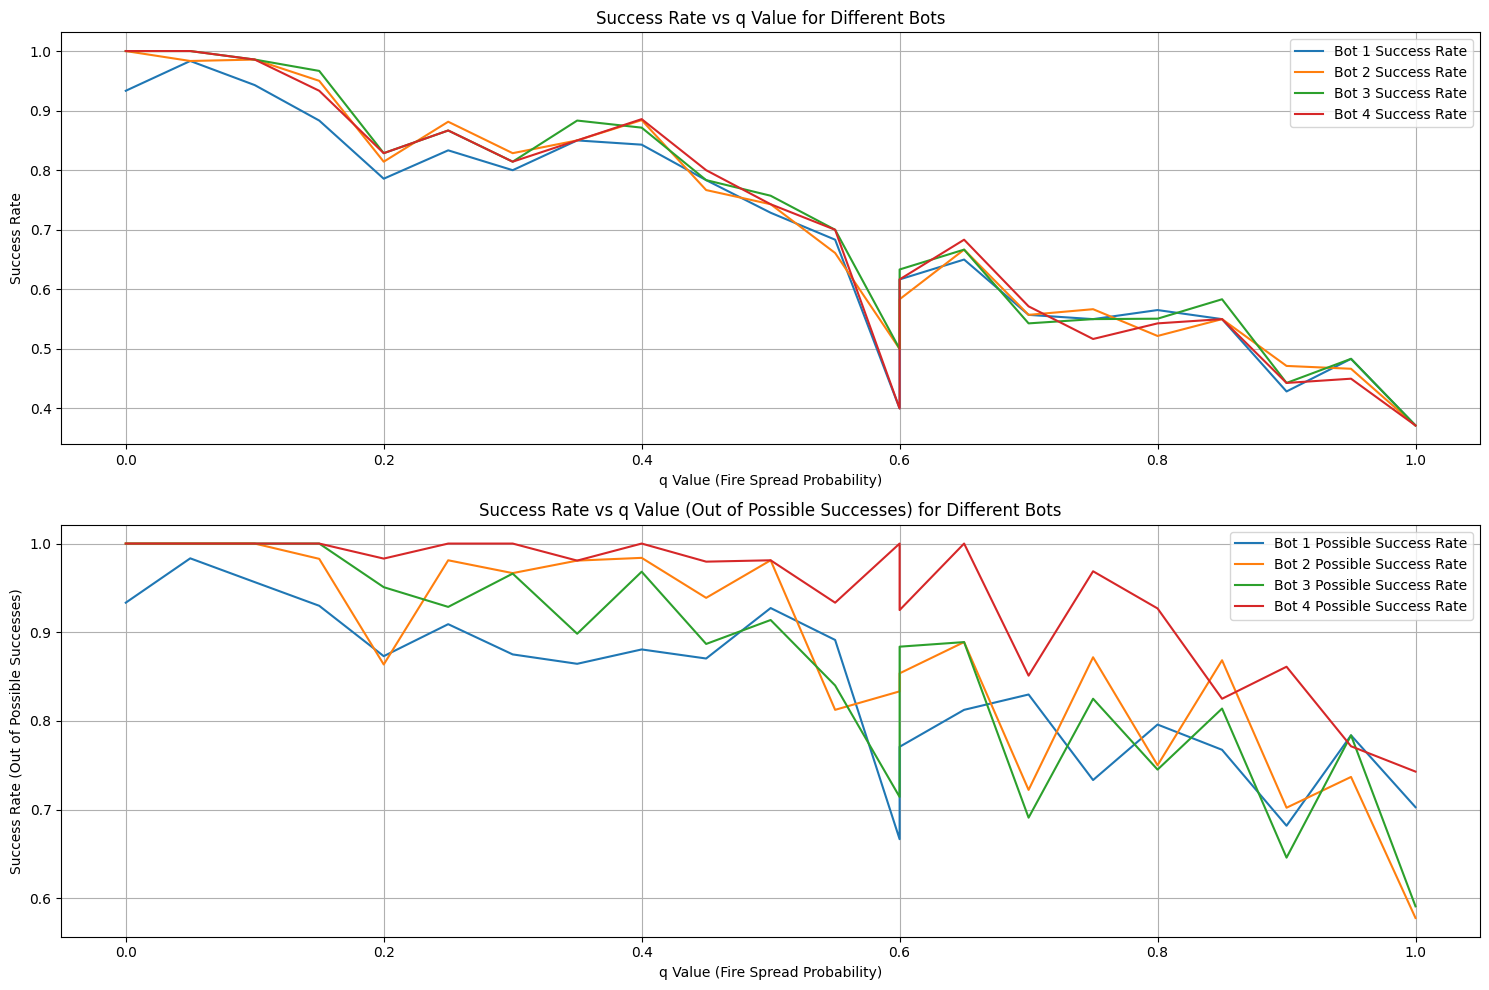

Accuracy Results for Each Bot:
Bot 1 Accuracy: 70.13%
Bot 2 Accuracy: 71.53%
Bot 3 Accuracy: 72.33%
Bot 4 Accuracy: 71.69%

Total Simulations per Bot:
Bot 1: 1359 simulations
Bot 2: 1356 simulations
Bot 3: 1359 simulations
Bot 4: 1360 simulations


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = '/Users/drcrocs22/Developer/Rutgers Projects/Intro To AI/PROJECT_1_FINAL/simulation_results.csv'
data = pd.read_csv(csv_file_path)

data['bot_pos_init'] = data['bot_pos_init'].apply(eval)
data['button_pos_init'] = data['button_pos_init'].apply(eval)
data['fire_init'] = data['fire_init'].apply(eval)

results = {}

bot_types = data['Bot Type'].unique()
q_values = sorted(data['q'].unique())

for bot in bot_types:
    bot_data = data[data['Bot Type'] == bot]
    results[bot] = {
        'success': [],
        'possible_success': []
    }
    
    for q in q_values:
        q_data = bot_data[bot_data['q'] == q]
        
        # Count successes
        success_count = q_data[q_data['result'] == 'Success'].shape[0]
        
        # Count possible successes (those that were not blocked by fire or other reasons)
        possible_success_count = q_data[~q_data['result'].isin(['Bot caught fire', 'Button caught fire'])].shape[0]
        
        # Store success rate and possible success rate
        if possible_success_count > 0:
            results[bot]['success'].append((q, success_count / q_data.shape[0]))
            results[bot]['possible_success'].append((q, success_count / possible_success_count))
        else:
            results[bot]['success'].append((q, 0))
            results[bot]['possible_success'].append((q, 0))


plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
for bot in bot_types:
    q_success_rate = [entry[1] for entry in results[bot]['success']]
    plt.plot(q_values, q_success_rate, label=f'{bot} Success Rate')

plt.xlabel('q Value (Fire Spread Probability)')
plt.ylabel('Success Rate')
plt.title('Success Rate vs q Value for Different Bots')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
for bot in bot_types:
    q_possible_success_rate = [entry[1] for entry in results[bot]['possible_success']]
    plt.plot(q_values, q_possible_success_rate, label=f'{bot} Possible Success Rate')

plt.xlabel('q Value (Fire Spread Probability)')
plt.ylabel('Success Rate (Out of Possible Successes)')
plt.title('Success Rate vs q Value (Out of Possible Successes) for Different Bots')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Accuracy Results for Each Bot:")
for bot in bot_types:
    total_trials = data[data['Bot Type'] == bot].shape[0]
    total_successes = data[(data['Bot Type'] == bot) & (data['result'] == 'Success')].shape[0]
    accuracy = (total_successes / total_trials) * 100 if total_trials > 0 else 0
    print(f"{bot} Accuracy: {accuracy:.2f}%")

print("\nTotal Simulations per Bot:")
for bot in bot_types:
    total_trials = data[data['Bot Type'] == bot].shape[0]
    print(f"{bot}: {total_trials} simulations")
